# Интерполяция полиномом Лагранжа

## Импорт библиотек

In [1]:
import sympy as sym  # библиотека символьных вычислений
import numpy as np # библиотека для работы с массивами
import math  # для операции факториала, числа pi
import matplotlib.pyplot as plt  # для построения графиков
import pandas as pd  # для построения таблицы
from IPython.display import display  # для вывода таблицы

## Инициализация символьных переменных и функции

In [2]:
x = sym.symbols('x')  # инициализировали символьные переменные
f = sym.Function('f')(x)  # инициализировали символьную функцию
# N = 1 - номер в списке группы
f = x - sym.sin(x) - 0.25  # определили функцию соответственно номеру в списке группы
a = 0
b = 10  # [a,b] - выбранный интервал интерполирования

### Определим функцию построения полиномов Лагранжа 

In [3]:
def get_knots(n, which):
    knots = []  
    if which == 'equidistant':  # равноотстоящие узлы интерполирования
        for i in range(n):
            xi = a + ((b-a)/(n-1))*i
            knots.append(xi)  
    elif which == 'optimal':  # оптимальные узлы интерполирования
        knots = list(((b-a)*sym.cos((2*i+1)*math.pi/(2*(n+1)))+b+a)/2 for i in range(n)) 
    return knots

In [4]:
def Ln(n, f, which):
    knots = get_knots(n, which)
    # строим полином Лагранжа
    L_n = 0
    for xi in knots:
        knots_wo_xi = knots.copy()
        knots_wo_xi.remove(xi)  # запомнили в переменную элементы knots кроме xi
        numerator_lk = 1  # строим l_k(x)
        denumerator_lk = 1
        for xk in knots_wo_xi:
            numerator_lk = numerator_lk*(x-xk)
            denumerator_lk = denumerator_lk*(xi-xk)
        l_k = numerator_lk/denumerator_lk
        L_n += l_k*f.subs(x, xi)  # полином Лагранжа
    return L_n

### Определим функцию подсчета максимума отклонения ИПЛ от функции f(x) на интервале [a,b]

In [5]:
def RL(n, m, f, which):
    L_n = Ln(n, f, which)
    T = list((b-a)/(m+1)*(i+1) for i in range(m))  # массив точек разбиения [a,b], в которых определяется отклонение 
    r = [f.subs(x, ti) - L_n.subs(x, ti) for ti in T]  # массив отклонений ИПЛ в точках T
    return max(r)

# Построение таблицы

In [6]:
df = pd.DataFrame({'n': [], 'm':[], 'RLn': [], 'RLoptn':[]})  # для построения таблицы поведения ИПЛ при увеличении количества узлов интерполирования
n_knots = [3, 5, 10, 20, 30, 50]  # количество узлов ИПЛ
for n in n_knots:
    m = 18*n  # – количество точек разбиения интервала интерполирования, в которых определяется отклонение ИПЛ от функции
    RLn = RL(n, m, f, 'equidistant')  # максимум отклонения на n равноотстоящих узлах
    RLn_opt = RL(n, m, f, 'optimal')  # максимум отклонения на n оптимальных узлах
    line = {'n': int(n), 'm':int(m), 'RLn': RLn, 'RLoptn': RLn_opt}
    df = df.append(line, ignore_index=True)
    print(line)  # добавлено, чтобы понимать, что функция работает, а не зависла
print()
print('Итоговая таблица: ')
display(df)

{'n': 3, 'm': 54, 'RLn': 0.0578456140477615, 'RLoptn': 1.52999863430000}
{'n': 5, 'm': 90, 'RLn': 1.00710417739628, 'RLoptn': 2.17894488337807}
{'n': 10, 'm': 180, 'RLn': 0.0210295388706186, 'RLoptn': 0.0106076460195285}
{'n': 20, 'm': 360, 'RLn': 7.01810276559911e-10, 'RLoptn': 5.86782597511437e-9}
{'n': 30, 'm': 540, 'RLn': 2.81180484451582e-9, 'RLoptn': 8.93729534823251e-15}
{'n': 50, 'm': 900, 'RLn': 0.00314127149541701, 'RLoptn': 6.58084697846562e-14}

Итоговая таблица: 


,n,m,RLn,RLoptn
0,3.0,54.0,0.0578456140477615,1.52999863430000
1,5.0,90.0,1.00710417739628,2.17894488337807
2,10.0,180.0,0.0210295388706186,0.0106076460195285
3,20.0,360.0,7.01810276559911e-10,5.86782597511437e-9
4,30.0,540.0,2.81180484451582e-9,8.93729534823251e-15
5,50.0,900.0,0.00314127149541701,6.58084697846562e-14


Таким образом, можно сделать вывод, что метод полиномиальной интерполяции Лагранжа по равноотстоящим узлам лучше всего приближает функцию при n около 20, по оптимальным узлам при n около 30

# Построение графиков
## По равноотстоящим узлам

Text(0, 0.5, 'Ln(x), n=50')

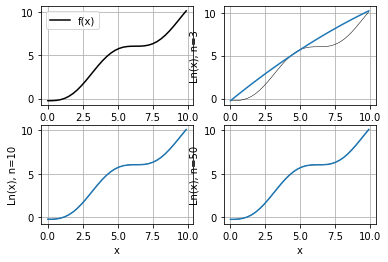

In [7]:
ab = np.arange(0,10,0.3)  # промежуток построения графиков
fx = np.array([f.subs(x, i) for i in ab])  # исходная функция на промежутке [0,10]
L3 = Ln(3,f,'equidistant')  # Ln(x), n=3
L10 = Ln(10,f,'equidistant')  # Ln(x), n=10
L50 = Ln(50,f,'equidistant')  # Ln(x), n=50 
L3x = np.array([L3.subs(x, i) for i in ab])  # массив значений Ln(x), n = 3, x в промежутке [0,10]
L10x = np.array([L10.subs(x, i) for i in ab])  # массив значений Ln(x), n = 10, x в промежутке [0,10]
L50x = np.array([L50.subs(x, i) for i in ab])  # массив значений Ln(x), n = 50, x в промежутке [0,10]

plt.figure(1)
plt.title('График №1')
plt.subplot(221)
plt.grid()
plt.plot(ab, fx, 'k')
plt.legend(['f(x)'])
plt.subplot(222)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, L3x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Ln(x), n=3')
plt.subplot(223)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, L10x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Ln(x), n=10')
plt.subplot(224)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, L50x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Ln(x), n=50')

Text(0.5, 1.0, 'График №1, по равноотстоящим узлам')

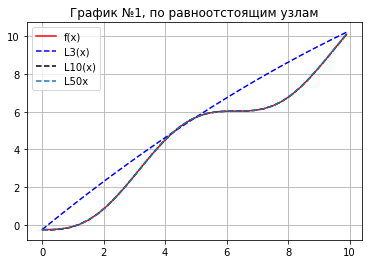

In [8]:
plt.figure(2)
plt.grid()
plt.plot(ab, fx, '-r')
plt.plot(ab, L3x, 'b--')  
plt.plot(ab, L10x, 'k--')
plt.plot(ab, L50x, '--')
plt.legend(['f(x)', 'L3(x)', 'L10(x)', 'L50x'])
plt.title('График №1, по равноотстоящим узлам')

## по оптимальным узлам

Text(0, 0.5, 'Ln_opt(x), n=50')

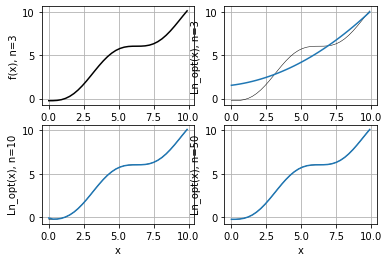

In [9]:
L3 = Ln(3,f,'optimal')  # Ln_opt(x), n=3
L10 = Ln(10,f,'optimal')  # Ln_opt(x), n=10
L50 = Ln(50,f,'optimal')  # Ln_opt(x), n=50 
L3x = np.array([L3.subs(x, i) for i in ab])  # массив значений Ln_opt(x), n = 3, x в промежутке [0,10]
L10x = np.array([L10.subs(x, i) for i in ab])  # массив значений Ln_opt(x), n = 10, x в промежутке [0,10]
L50x = np.array([L50.subs(x, i) for i in ab])  # массив значений Ln_opt(x), n = 50, x в промежутке [0,10]

plt.figure(1)
plt.title('График №1')
plt.subplot(221)
plt.grid()
plt.plot(ab, fx, 'k')
plt.ylabel('f(x), n=3')
plt.subplot(222)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, L3x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Ln_opt(x), n=3')
plt.subplot(223)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, L10x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Ln_opt(x), n=10')
plt.subplot(224)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, L50x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Ln_opt(x), n=50')

Text(0.5, 1.0, 'График №2, по оптимальным узлам')

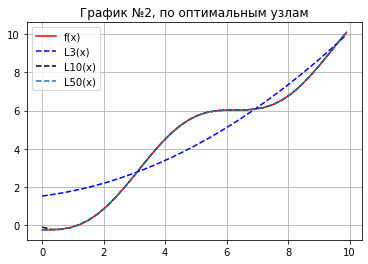

In [10]:
plt.figure(2)
plt.grid()
plt.plot(ab, fx, '-r')
plt.plot(ab, L3x, 'b--')  
plt.plot(ab, L10x, 'k--')
plt.plot(ab, L50x, '--')  
plt.legend(['f(x)', 'L3(x)', 'L10(x)', 'L50(x)'])
plt.title('График №2, по оптимальным узлам')